# Participant Screening - Experiment 3: IT LongTone

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from glob import glob

DATAFILE = '../data/tap_data.csv'
OUTFILE = '../data/excluded.txt'

# Load data

In [2]:
all_data = pd.read_csv(DATAFILE)
data = all_data.copy()

# Headphone Test
Identify participants who got answered fewer than four headphone test trials correctly.

EXCLUDED: 10
[12 29 31 33 43 41 46 61 63 80]


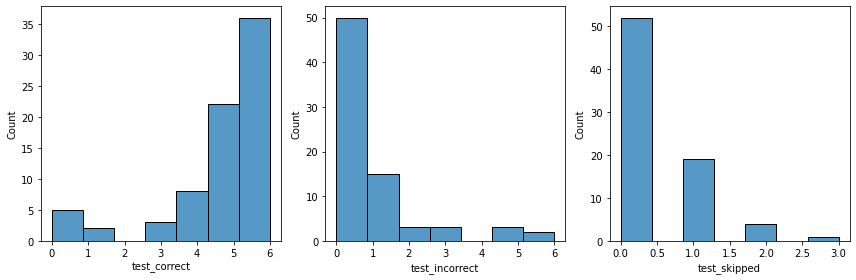

In [3]:
failed_test = np.array(data[data.test_correct < 4].subject)
print('EXCLUDED: %i' % len(failed_test))
print(failed_test)

# Audio test performance
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(data.test_correct, bins=7)
plt.subplot(132)
sns.histplot(data.test_incorrect, bins=7)
plt.subplot(133)
sns.histplot(data.test_skipped, bins=7)
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, failed_test)]

# Extreme Response Check
Identify participants who responded 0/50/100 at least 75 times.

EXCLUDED: 3
[21 67 72]


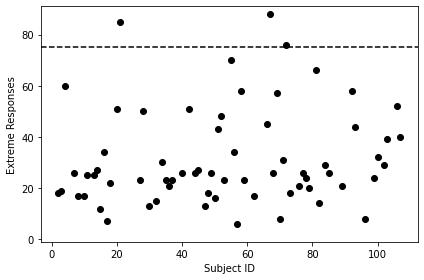

In [4]:
grouped = data.groupby('subject')
extreme_resp = grouped.extreme_responses.mean() >= 75
extreme_resp = np.array(extreme_resp[extreme_resp].reset_index().subject)
print('EXCLUDED: %i' % len(extreme_resp))
print(extreme_resp)

plt.scatter(data.subject, data.extreme_responses, c='k', label='Included')
plt.axhline(75, c='k', ls='--')
plt.ylim(-1, 91)
plt.ylabel('Extreme Responses')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, extreme_resp)]

# Outlier Response Check
Exclude participants whose responses were correlated r < .5 with the log of IOI.

EXCLUDED: 0
[]


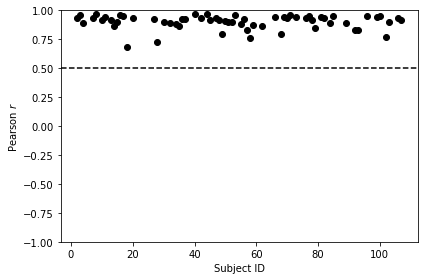

In [5]:
outlier = np.array(data[data.pearsonr < .5].subject)
print('EXCLUDED: %i' % len(outlier))
print(outlier)

plt.scatter(data.subject, data.pearsonr, c='k')
plt.axhline(.5, c='k', ls='--')
plt.ylim(-1, 1)
plt.ylabel('Pearson $r$')
plt.xlabel('Subject ID')
plt.tight_layout()

# Drop excluded subjects before proceeding
data = data[~np.isin(data.subject, outlier)]

# Save Exclusion

In [6]:
excluded = np.union1d(np.union1d(failed_test, extreme_resp), outlier)
included = data.subject.unique()
np.savetxt(OUTFILE, excluded, fmt='%i')

In [7]:
conditions = np.array([x for x in all_data.tap_condition])
incl_conditions = np.array([x for x in data.tap_condition])

print('EXCLUSION LIST:', excluded.tolist())
print('INCLUSION LIST:', included.tolist())
print('TOTALS:', len(excluded) + len(included), len(included))
print('CONDITIONS:', np.sum(~conditions), np.sum(conditions), np.sum(~incl_conditions), np.sum(incl_conditions))

EXCLUSION LIST: [12, 21, 29, 31, 33, 41, 43, 46, 61, 63, 67, 72, 80]
INCLUSION LIST: [2, 3, 7, 8, 10, 11, 14, 13, 15, 16, 17, 4, 18, 20, 27, 28, 30, 32, 34, 35, 36, 37, 40, 42, 44, 45, 47, 48, 49, 53, 50, 51, 52, 55, 56, 57, 58, 59, 62, 66, 68, 69, 71, 70, 73, 76, 77, 78, 79, 81, 82, 84, 85, 89, 92, 93, 96, 99, 100, 102, 103, 106, 107]
TOTALS: 76 63
CONDITIONS: 37 39 30 33
